In [1]:
import numpy as np

np.set_printoptions(threshold=10000, suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

#warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import pickle

from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv('Surgery.csv', sep=';') # lit le fichier csv et le met dans un dataframe en utilisant le séparateur ';'

In [3]:
data

,PatientID,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,1,19.31,59.2,1,1,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,2,18.73,59.1,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,3,21.85,59.0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,4,18.49,59.0,1,0,1,0,0,1,1,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,5,19.70,59.0,1,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10104,10105,27.99,65.5,0,0,0,0,0,0,0,...,0.00,3,1,12.80,4,0,0,-0.75,1,1
10105,10106,23.67,65.4,0,0,4,1,0,0,1,...,-0.05,0,1,11.60,0,0,0,-1.05,0,1
10106,10107,33.63,65.4,0,1,2,1,0,0,1,...,-1.33,3,0,8.13,2,1,0,-1.92,1,1
10107,10108,22.22,65.4,0,1,2,0,0,0,0,...,-0.57,1,1,7.50,4,0,0,-0.09,1,1


In [4]:
data.head()

,PatientID,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,1,19.31,59.2,1,1,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,2,18.73,59.1,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,3,21.85,59.0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,4,18.49,59.0,1,0,1,0,0,1,1,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,5,19.70,59.0,1,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [5]:
columns=data.columns

In [6]:
columns

Index(['PatientID', 'bmi', 'Age', 'asa_status', 'baseline_cancer',
       'baseline_charlson', 'baseline_cvd', 'baseline_dementia',
       'baseline_diabetes', 'baseline_digestive', 'baseline_osteoart',
       'baseline_psych', 'baseline_pulmonary', 'ahrq_ccs',
       'ccsComplicationRate', 'ccsMort30Rate', 'complication_rsi', 'dow',
       'gender', 'hour', 'month', 'moonphase', 'mort30', 'mortality_rsi',
       'race', 'complication'],
      dtype='object')

In [7]:
X = data.drop('complication', axis=1).values # supprime la colonne 'Exited' et met le reste dans X
Y = data['complication'].values # met la colonne 'Exited' dans Y

In [8]:
X,Y

(array([[    1.  ,    19.31,    59.2 , ...,     0.  ,    -0.43,     1.  ],
        [    2.  ,    18.73,    59.1 , ...,     0.  ,    -0.41,     1.  ],
        [    3.  ,    21.85,    59.  , ...,     0.  ,     0.08,     1.  ],
        ...,
        [10107.  ,    33.63,    65.4 , ...,     0.  ,    -1.92,     1.  ],
        [10108.  ,    22.22,    65.4 , ...,     0.  ,    -0.09,     1.  ],
        [10109.  ,    25.95,    65.4 , ...,     0.  ,    -1.  ,     1.  ]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [9]:
# Analyse des propriétés des données pour le jeu de données "Surgery.csv"
taille_echantillon_surgery = X.shape
pourcentage_positifs_surgery = np.mean(Y == 1) * 100
pourcentage_negatifs_surgery = np.mean(Y == 0) * 100

taille_echantillon_surgery, pourcentage_positifs_surgery, pourcentage_negatifs_surgery


((10109, 25), 25.403106143040855, 74.59689385695914)

In [10]:
# Séparation des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5054, 25), (5055, 25), (5054,), (5055,))

In [11]:
# Normalisation des variables continues

# Initialisation du StandardScaler
scaler = StandardScaler()

# Normalisation des ensembles d'apprentissage et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vérification des propriétés des données normalisées
# Moyenne et écart-type de l'ensemble d'apprentissage normalisé
train_mean = np.mean(X_train_scaled, axis=0)
train_std = np.std(X_train_scaled, axis=0)

# Moyenne et écart-type de l'ensemble de test normalisé
test_mean = np.mean(X_test_scaled, axis=0)
test_std = np.std(X_test_scaled, axis=0)

train_mean, train_std, test_mean, test_std


(array([ 0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,
        -0.,  0.,  0., -0.,  0., -0., -0., -0.,  0.,  0., -0.,  0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]),
 array([-0.00132283,  0.01163606, -0.01909568,  0.01914114,  0.03348038,
         0.05832556, -0.00382827, -0.02212175, -0.00864104, -0.00611512,
        -0.00845363, -0.01291795,  0.03116418,  0.0075423 ,  0.01305205,
         0.01098236,  0.00713699,  0.01363983,  0.00890135, -0.00491469,
         0.01927958,  0.01226549, -0.01203275,  0.00648922, -0.01224829]),
 array([0.99140515, 1.01041239, 1.00033346, 0.99977932, 1.01601251,
        1.08147964, 1.00055603, 0.85348281, 0.98971125, 0.99520586,
        0.99592334, 0.98030336, 1.04347237, 1.00533496, 1.00839658,
        1.01764972, 0.99377621, 1.0034575 , 0.99960072, 0.99368234,
        0.98287034, 0.99580821, 0.90480429, 1.000962  , 1.01798416]))

In [12]:
# Création de nouvelles variables caractéristiques par ACP

# Initialisation de PCA pour conserver les 3 premières composantes principales
pca = PCA(n_components=3)

# Application de PCA sur les données d'entraînement normalisées et concaténation avec les données originales
X_train_pca = pca.fit_transform(X_train_scaled)
X_train_augmented = np.concatenate([X_train_scaled, X_train_pca], axis=1)

# Application de PCA sur les données de test normalisées (en utilisant le même transformateur PCA) et concaténation
X_test_pca = pca.transform(X_test_scaled)
X_test_augmented = np.concatenate([X_test_scaled, X_test_pca], axis=1)

# Vérification des dimensions des nouveaux ensembles de données
X_train_augmented.shape, X_test_augmented.shape


((5054, 28), (5055, 28))

In [13]:
# Suppression des variables potentiellement non pertinentes ou trompeuses
columns_to_drop = ['PatientID', 'dow', 'moonphase']  

# Mise à jour des ensembles de caractéristiques en supprimant les colonnes sélectionnées
X_train_reduced = np.delete(X_train_scaled, [data.columns.get_loc(c) for c in columns_to_drop], axis=1)
X_test_reduced = np.delete(X_test_scaled, [data.columns.get_loc(c) for c in columns_to_drop], axis=1)

# Application de PCA sur les données réduites
pca_reduced = PCA(n_components=3)
X_train_pca_reduced = pca_reduced.fit_transform(X_train_reduced)
X_train_augmented_reduced = np.concatenate([X_train_reduced, X_train_pca_reduced], axis=1)
X_test_pca_reduced = pca_reduced.transform(X_test_reduced)
X_test_augmented_reduced = np.concatenate([X_test_reduced, X_test_pca_reduced], axis=1)

# Entraînement du modèle RandomForest avec les données réduites
clf_reduced = RandomForestClassifier(n_estimators=100)
clf_reduced.fit(X_train_augmented_reduced, y_train)

# Obtention des nouvelles importances des caractéristiques
importances_reduced = clf_reduced.feature_importances_
std_reduced = np.std([tree.feature_importances_ for tree in clf_reduced.estimators_], axis=0)
sorted_idx_reduced = np.argsort(importances_reduced)[::-1]

# Mise à jour des noms des caractéristiques (en excluant les colonnes supprimées)
features_reduced = [f for f in data.columns if f not in columns_to_drop]
features_reduced = features_reduced[:-1] + ["PCA1", "PCA2", "PCA3"]  # Exclusion de 'complication' et ajout des PCA
sorted_features_reduced = [features_reduced[i] for i in sorted_idx_reduced]

# Affichage des nouvelles caractéristiques triées par importance
sorted_features_reduced


['Age',
 'complication_rsi',
 'PCA2',
 'PCA1',
 'mortality_rsi',
 'PCA3',
 'bmi',
 'ccsComplicationRate',
 'hour',
 'month',
 'ahrq_ccs',
 'ccsMort30Rate',
 'baseline_charlson',
 'asa_status',
 'gender',
 'baseline_cvd',
 'baseline_digestive',
 'race',
 'baseline_osteoart',
 'baseline_cancer',
 'baseline_psych',
 'baseline_diabetes',
 'baseline_pulmonary',
 'baseline_dementia',
 'mort30']

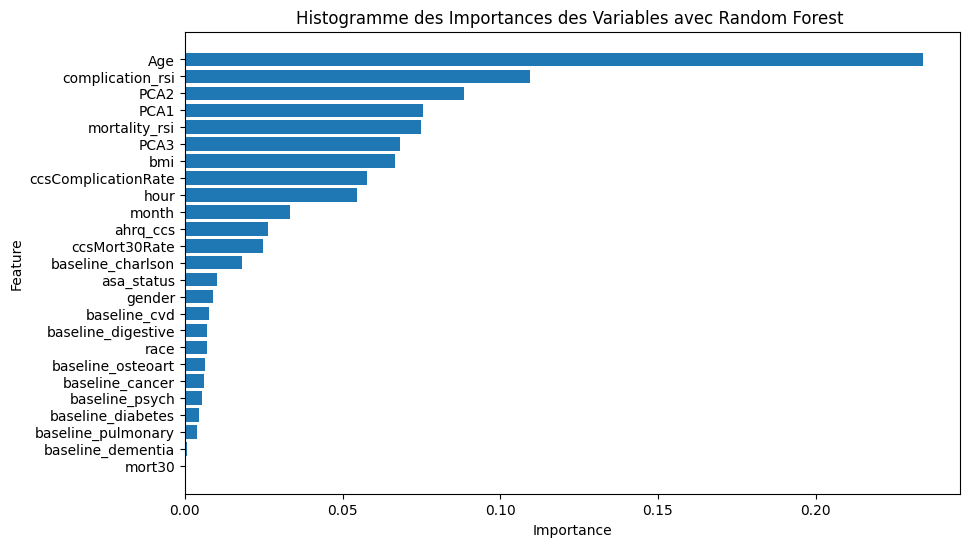

In [14]:
# Création d'un DataFrame pour visualiser les importances des variables avec les données réduites
importances_df_reduced = pd.DataFrame({
    'Feature': sorted_features_reduced,
    'Importance': importances_reduced[sorted_idx_reduced]
})

# Tri des variables par importance
importances_df_reduced = importances_df_reduced.sort_values(by='Importance', ascending=False)

# Affichage d'un histogramme des importances des variables avec les données réduites
plt.figure(figsize=(10, 6))
plt.barh(importances_df_reduced['Feature'], importances_df_reduced['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Histogramme des Importances des Variables avec Random Forest ')
plt.gca().invert_yaxis()  # Inverser l'axe Y pour avoir la variable la plus importante en haut
plt.show()


In [15]:

from sklearn.naive_bayes import GaussianNB
clfs = {
    'NBS': GaussianNB(),
    'CART': DecisionTreeClassifier(),
    'ID3': DecisionTreeClassifier(criterion='entropy'),
    'DS': DecisionTreeClassifier(max_depth=1),
    'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Bagging': BaggingClassifier(n_estimators=200, random_state=1),
    'AB': AdaBoostClassifier(n_estimators=200, random_state=1),
    'RF': RandomForestClassifier(n_estimators=200, random_state=1)
} # dictionnaire de classifieurs

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, precision_score
from sklearn.naive_bayes import GaussianNB  # Import GaussianNB classifier
import time

# Define your custom scoring function
def custom_score(y_true, y_pred):
    precision_class_0 = precision_score(y_true, y_pred, pos_label=0)
    precision_class_1 = precision_score(y_true, y_pred, pos_label=1)
    return 0.5 * precision_class_0 + 0.5 * precision_class_1

# Create a scorer using your custom scoring function
custom_scorer = make_scorer(custom_score)

# Modify the function to run classifiers and measure time
def run_classifiers(clfs, X, Y, scorer):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)

    scores_means, scores_stds, times_means, times_stds = [], [], [], []

    for name in clfs:
        clf = clfs[name]
        start_time = time.time()  # Measure start time
        cv_results = cross_val_score(clf, X, Y, cv=kf, scoring=scorer, n_jobs=-1)
        end_time = time.time()  # Measure end time

        scores_means.append(cv_results.mean())
        scores_stds.append(cv_results.std())

        # Calculate the execution time for the current classifier
        execution_time = end_time - start_time
        times_means.append(execution_time)
        times_stds.append(0)  # Since we're not calculating std deviation for time

        print(f"Score for {name} is: {cv_results.mean():.3f} +/- {cv_results.std():.3f}")
        print(f"Execution Time for {name} is: {execution_time:.3f} seconds\n")

    names = list(clfs.keys())
    bar_width = 0.35
    r = np.arange(len(scores_means))

    # Plot for scores
    plt.figure(figsize=(10, 6))
    plt.bar(r, scores_means, width=bar_width, yerr=scores_stds, label='Score')
    plt.ylabel('Score')
    plt.title('Classifier Score Comparison')
    plt.xticks(r, names)
    plt.legend()

    # Plot for execution times
    plt.figure(figsize=(10, 6))
    plt.bar(r, times_means, width=bar_width, yerr=times_stds, label='Execution Time')
    plt.ylabel('Time (s)')
    plt.title('Classifier Execution Time Comparison')
    plt.xticks(r, names)
    plt.legend()

    plt.show()




Score for NBS is: 0.690 +/- 0.037
Execution Time for NBS is: 1.522 seconds

Score for CART is: 0.817 +/- 0.017
Execution Time for CART is: 0.746 seconds

Score for ID3 is: 0.820 +/- 0.012
Execution Time for ID3 is: 0.151 seconds

Score for DS is: 0.718 +/- 0.026
Execution Time for DS is: 0.035 seconds

Score for MLP is: 0.734 +/- 0.026
Execution Time for MLP is: 2.843 seconds

Score for KNN is: 0.696 +/- 0.019
Execution Time for KNN is: 0.115 seconds

Score for Bagging is: 0.894 +/- 0.022
Execution Time for Bagging is: 11.360 seconds

Score for AB is: 0.878 +/- 0.021
Execution Time for AB is: 1.886 seconds

Score for RF is: 0.859 +/- 0.016
Execution Time for RF is: 3.317 seconds



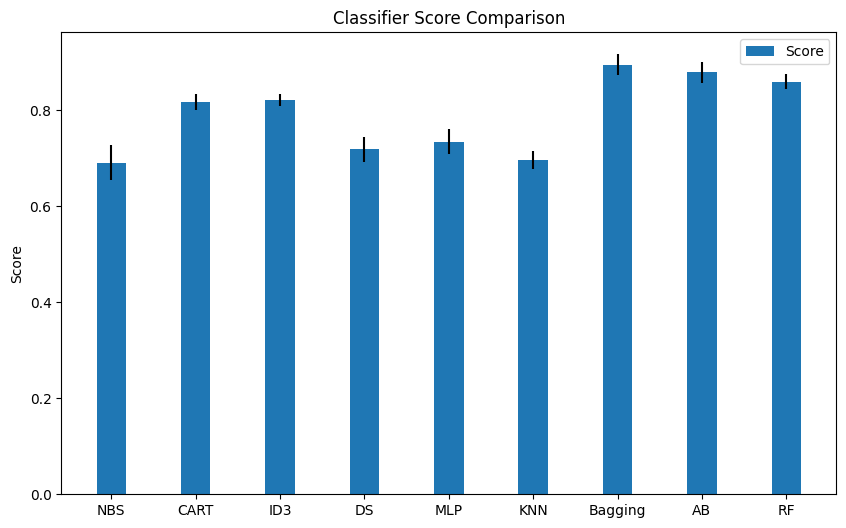

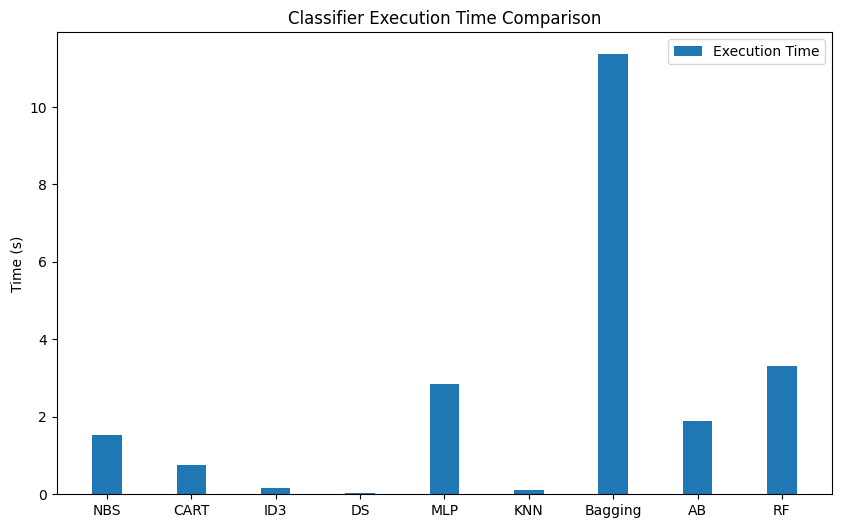

In [17]:
#On utilisant juste la normalisation
run_classifiers(clfs,X_train_reduced,y_train, custom_scorer)

Score for NBS is: 0.690 +/- 0.040
Execution Time for NBS is: 0.028 seconds

Score for CART is: 0.616 +/- 0.019
Execution Time for CART is: 0.098 seconds

Score for ID3 is: 0.597 +/- 0.023
Execution Time for ID3 is: 0.115 seconds

Score for DS is: 0.399 +/- 0.082
Execution Time for DS is: 0.026 seconds

Score for MLP is: 0.719 +/- 0.035
Execution Time for MLP is: 2.835 seconds

Score for KNN is: 0.667 +/- 0.026
Execution Time for KNN is: 0.056 seconds

Score for Bagging is: 0.672 +/- 0.029
Execution Time for Bagging is: 10.019 seconds

Score for AB is: 0.699 +/- 0.040
Execution Time for AB is: 1.974 seconds

Score for RF is: 0.684 +/- 0.029
Execution Time for RF is: 4.882 seconds



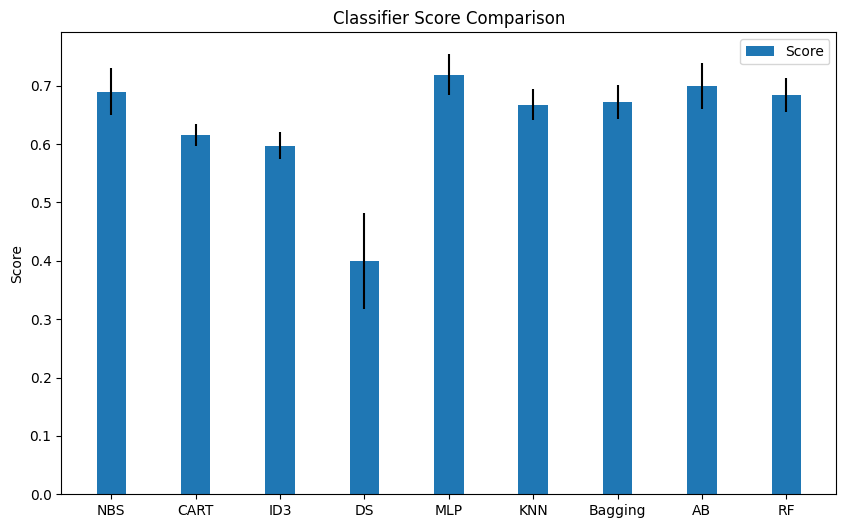

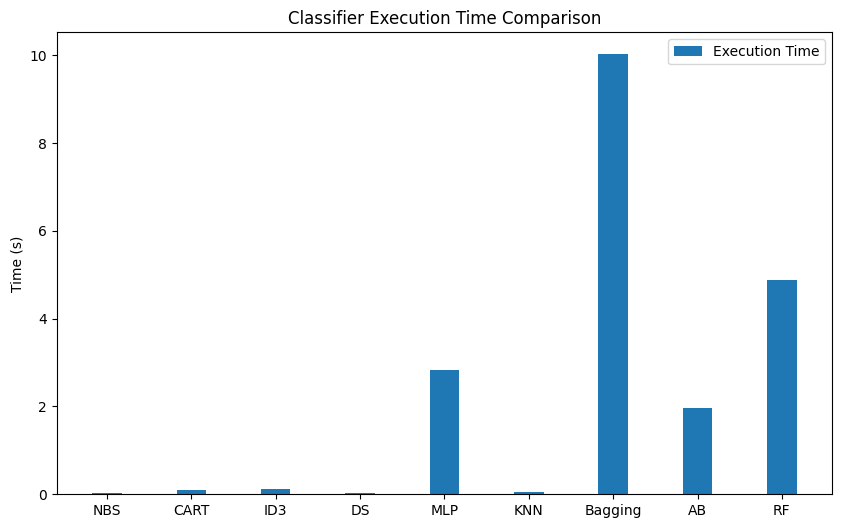

In [18]:
#On utilisant PCA sur les données normalisées 
run_classifiers(clfs,X_train_pca_reduced,y_train, custom_scorer)

Score for NBS is: 0.690 +/- 0.034
Execution Time for NBS is: 0.048 seconds

Score for CART is: 0.820 +/- 0.023
Execution Time for CART is: 0.183 seconds

Score for ID3 is: 0.823 +/- 0.019
Execution Time for ID3 is: 0.165 seconds

Score for DS is: 0.718 +/- 0.026
Execution Time for DS is: 0.045 seconds

Score for MLP is: 0.729 +/- 0.019
Execution Time for MLP is: 3.446 seconds

Score for KNN is: 0.693 +/- 0.024
Execution Time for KNN is: 0.104 seconds

Score for Bagging is: 0.893 +/- 0.022
Execution Time for Bagging is: 20.587 seconds

Score for AB is: 0.875 +/- 0.020
Execution Time for AB is: 3.703 seconds

Score for RF is: 0.857 +/- 0.020
Execution Time for RF is: 5.994 seconds



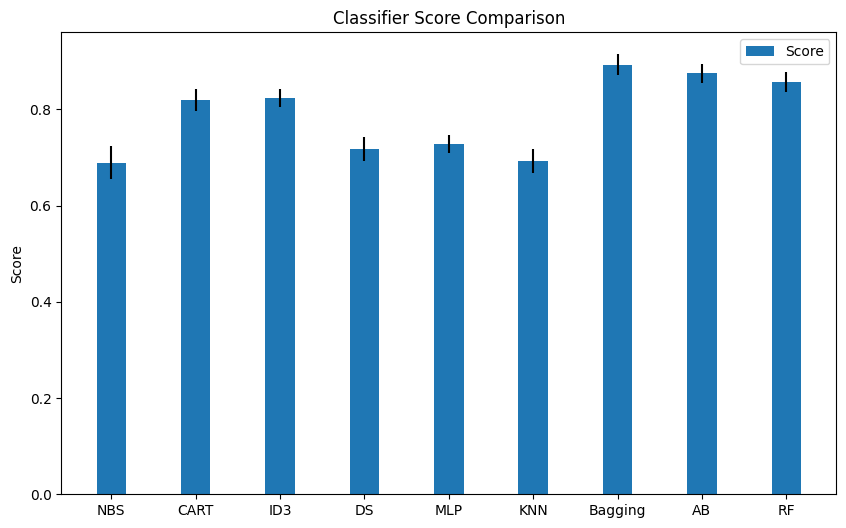

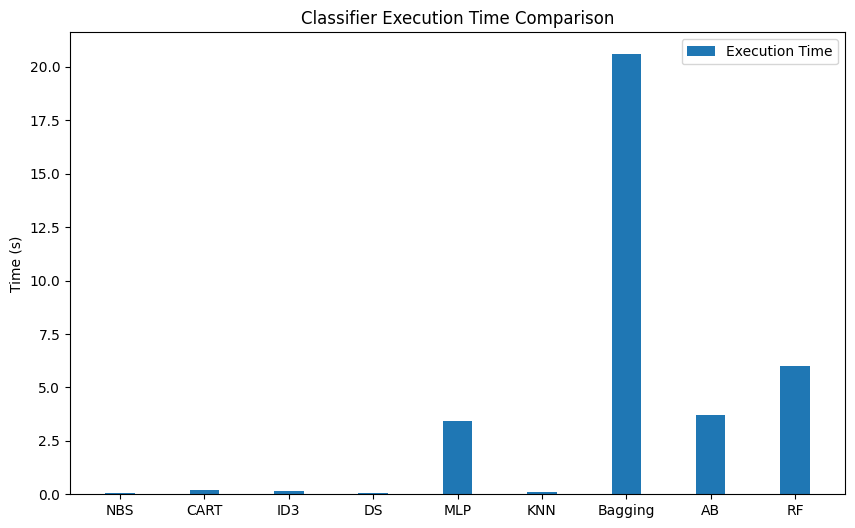

In [19]:
#Sur les données augmentées
run_classifiers(clfs,X_train_augmented_reduced,y_train, custom_scorer)

In [ ]:
#Bagging est le meilleur algorithme
# Initialisation du classifieur Bagging
Bagging_Classifier = BaggingClassifier(n_estimators=200, random_state=1)

# Calcul de la précision pour différents nombres de variables
scores = np.zeros(X_train_augmented_reduced.shape[1] + 1)

for f in np.arange(0, X_train_augmented_reduced.shape[1] + 1):
    # Sélection des f premières caractéristiques les plus importantes
    X1_f = X_train_augmented_reduced[:, sorted_idx_reduced[:f + 1]]
    X2_f = X_test_augmented_reduced[:, sorted_idx_reduced[:f + 1]]

    # Entraînement et prédiction avec le classifieur Bagging
    Bagging_Classifier.fit(X1_f, y_train)
    y_pred = Bagging_Classifier.predict(X2_f)

    # Calcul de la précision
    scores[f] = np.round(accuracy_score(y_test, y_pred), 3)

# Affichage du graphique précision vs. nombre de variables
plt.plot(scores)
plt.xlabel("Number of Variables")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Variables using Bagging Classifier")
plt.show()


In [22]:
# Sélection des meilleures variables en fonction du score maximal atteint dans le graphique précédent
num_best_features = scores.argmax() + 1

# Sélection des meilleures caractéristiques pour les ensembles d'entraînement et de test
X_train_best = X_train[:, sorted_idx_reduced[:num_best_features]]
X_test_best = X_test[:, sorted_idx_reduced[:num_best_features]]

# Sélection des meilleures caractéristiques pour l'ensemble de données combiné (si nécessaire)
# Note: X_concat n'est pas défini précédemment. Si vous avez un ensemble de données combiné, veuillez le remplacer par la variable appropriée.
# X_best = X_concat[:, sorted_idx_reduced[:num_best_features]]

X_train_best.shape, X_test_best.shape  #, X_best.shape (si X_concat est défini)


((5054, 7), (5055, 7))

In [ ]:
# Utilisation de BaggingClassifier au lieu de MLPClassifier pour la recherche de grille
bagging = BaggingClassifier(random_state=1)
param_grid_bagging = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Initialisation de GridSearchCV avec le score personnalisé pour BaggingClassifier
grid_bagging = GridSearchCV(bagging, param_grid_bagging, scoring=custom_scorer)
grid_bagging.fit(X_train_best, y_train)

# Affichage des résultats pour BaggingClassifier
print("Best cross-validation score: {}".format(grid_bagging.best_score_))
print("Best parameters: ", grid_bagging.best_params_)
print("Test set score: {}".format(grid_bagging.score(X_test_best, y_test)))
